# R for Data Analysis and Probability Functions


In [1]:
library(gtools)
install.packages("moments")
library(moments)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Random Variables (R.V.)
* A random variable, usually written X, is a variable whose possible values are numerical outcomes of a random phenomenon.
* A random variable is always denoted with an upper case
* An observed variable is denoted with a lower case

### There are two types of random variables:

* **Discrete random variable**: Takes on a finite (or countably infinite) number of values. ex) average height of 100 people
* **Continuous random variable**: Takes on an interval of values (uncountably infinite values) ex) number of people present in this class




## Discrete
### Distribution of Discrete RV
* The distribution of a discrete random variable is described by a collection of possible distinct outcomes and their associated probabilities. 
* It is described by the probability mass function (PMF) and the cumulative distribution function (CDF).


## Example 1: Binomial Distribution

A binomial random variable counts how often a particular event occurs in a fixed number of tries or trials. This is usually likened to a coin flip or True verses False. For a variable to be a binomial random variable, ALL of the following conditions must be met:

* There are a fixed number of trials (a fixed sample size).
* On each trial, the event of interest either occurs (success) or does not (failure).
* The probability of occurrence (or not) is the same on each trial.
* Trials are independent of one another.

Example: Number of left-handers in a randomly selected sample of 50 unrelated people

You need:
* n=number of trials (sample size)
* p= probability event occurs on any one trial

$$P(X=x)={{n}\choose{x}} p^x (1-p)^{n-x}$$
for $x=0, 1, 2,..., n$ where $ {{n}\choose{x}}=\frac{n!}{x!(n-x)!}$

In [2]:
#Generate N=15 independent binomial random variables with n=5 trials and probability p=.6
rbinom(15, 5,.6 ) ## this means that out of 5 trials we either get a success or we do not with a probability of 0.6

[1] 2 2 2 4 3 3 4 2 1 2 4 4 5 4 3

In [3]:
#What if we up the probability to p=0.99 for getting a success?

rbinom(15, 5,.99 )

[1] 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5

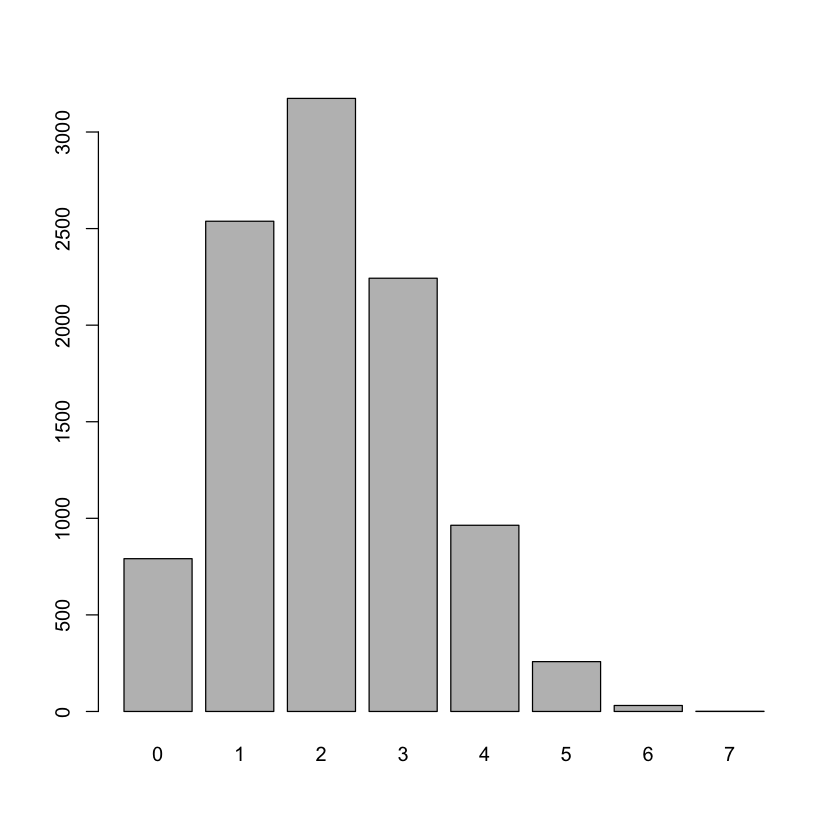

In [4]:
# Probability distribution
#Generate a sample of N=10,000 with n=7 trials and a probability of success p=.3
X=rbinom(10000,7, .3)

#X
# Barplot of the probability distribution 
## Why barplot and not a histogram??
# If I sample 10,000 numbers from Bin(n=7, p=.3), what does the distribution look like?
barplot(table(X))


In [5]:
##distribution: this gives you the probability of x=0,1,2,3,4,5,6,7
dbinom(0:7, 7, .3)
#note: these outputs are between 0 and 1 and are probabilities! ie) a single point/outcome has probability

[1] 0.0823543 0.2470629 0.3176523 0.2268945 0.0972405 0.0250047 0.0035721
[8] 0.0002187

In [6]:
#check our assumption that the probabilities sum to 1!
sum(dbinom(0:7, 7, .3))


[1] 1

In [7]:
#Example: What is the probability of exactly 2 successes (P(X=2)) for a binomial distribution Bin(n=7, p=.3)? 
dbinom(2,7,.3) #calculate using R
#choose(7,2)*(.3^2)*(.7^5) #calculate by hand

[1] 0.3176523

### Describing our distribution:
#### Population Mean of Binomial Distribution: $E(x)=n*p$
#### Population Variance of Binomial Distribution: $Var(x)=n*p(1-p)$
#### Population Standard deviation of Binomial Distribution: $sd(x)=\sqrt{ n*p(1-p)}$

In [8]:
#sample mean
mean(X) 
7*.3
#sample variance
var(X)
7*.3*(1-.3)
#sample standard deviation
sd(X)
sqrt(7*.3*(1-.3))

[1] 2.0954

[1] 2.1

[1] 1.455444

[1] 1.47

[1] 1.206418

[1] 1.212436

#### With a large sample our expected mean and variance for the population are close to our sample mean and variance!

#### What happens when we have a smaller sample?


In [9]:
#Sample of 10
X_10=rbinom(10,7, .3)
#sample mean
mean(X_10)
7*.3
#sample variance
var(X_10)
7*.3*(1-.3)
#sample standard deviation
sd(X_10)
sqrt(7*.3*(1-.3))

[1] 2.5

[1] 2.1

[1] 2.5

[1] 1.47

[1] 1.581139

[1] 1.212436

## Continuous 
### Distribution of Continuous RV
* The distribution of a continuous random variable is described by its probability density function (PDF). You can find the probability between two constants by adding up the area under the density curve. 

* Note: Unlike discrete random variables where we can determine $P(X=x)$ for all possible values of x and get a probability for a point, the probability that X takes on any particular value x is 0 for continuous random variables. AKA. We can't find $P(X=x)$!

* Instead, we find the probability that $X$ falls into some interval $(a,b)$ ie. $P(a<X<b)$.  We can use the PDF to do this!

### Probability Density Function (PDF) and Cumulative Distribution Function (CDF)
* PDF is denoted by $f_X(x)$
* CDF is denoted by $F_X(x)$

Outputs of $f_X(x)$ are NOT probabilities!

### Describing A Distribution:
* E(x)=Expected Value ($\mu$)= mean of a random variable X 
* Var(x)= Variance ($\sigma^2$)= how far a set of numbers is spread out from their average value
* Skewness=measure of lack of symmetry
* Kirtosis=how tall and sharp the central peak is
* Median=midpoint


## Example 2: Normal (Gaussian) Distribution

$$f_X(x)=\frac{1}{{\sigma \sqrt{2\pi } }}  e^{\frac{ - ( x - \mu )^2} {2\sigma^2}} $$

where $-\infty<x<\infty$.

Mean=$\mu$ and $\mu\in\mathbb{R}$ 

Variance=$\sigma^2$ and $\sigma^2>0$ 

* Standard normal distribution has $\mu=0$ and $\sigma=1$

In [11]:
#Generate N=15 independent normal random variables with mean=20 and sd=8 
N_15=rnorm(15, mean=20,sd=8 ) 
N_15

[1] 29.969014 22.523918 16.716815 40.289474 21.161304 21.830453 26.032800
 [8] 20.692651 18.277216 21.278241 20.262176 27.875168 36.310016 18.841282
[15]  6.687628

In [12]:
#What is the mean of our sample?
mean(N_15) #Is this close to E(x)=20?


[1] 23.24988

In [13]:
#What is the variance of our sample? The standard deviation?
var(N_15) 
sd(N_15) 

[1] 65.90064

[1] 8.117921

In [14]:
#What is the skewness and kurtosis of our sample?
skewness(N_15) #skewness of normal distribution is 0!
#negative indicates skewed left, positive indicates skewed right
kurtosis(N_15) #kurtosis of normal distribution should be near 3

[1] 0.3461781

[1] 3.421628

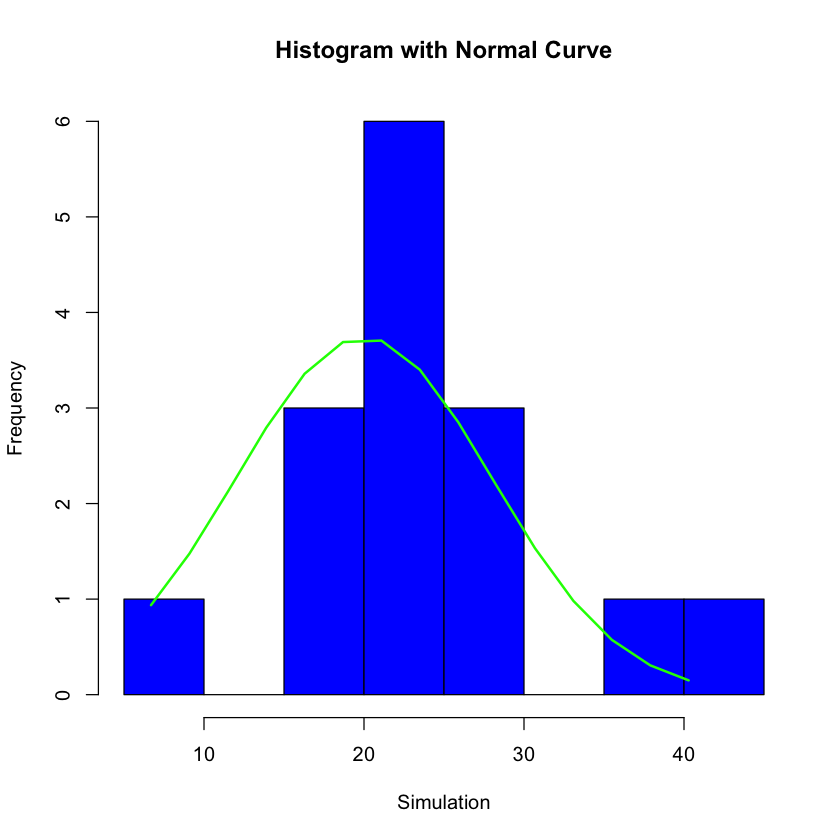

In [15]:
#plot a histogram of the distribution of our sample
h<-hist(N_15, breaks=5, col="blue", xlab="Simulation", 
  	main="Histogram with Normal Curve") 
xfit<-seq(min(N_15),max(N_15),length=15) 
yfit<-dnorm(xfit,mean=20,sd=8) 
yfit <- yfit*diff(h$mids[1:2])*length(N_15) 
lines(xfit, yfit, col="green", lwd=2) #normal curve



In [22]:
#Now generate N=10000 independent normal random variables with mean=20 and sd=8
N_big=rnorm(10000, mean=20, sd=8)


In [23]:
#What is the mean of our sample?
mean(N_big) #Is this close to E(x)=20?

### THis is called the law of large numbers!  
#The average of the results obtained from a large number of 
#trials should be close to the expected value

[1] 19.96368

In [24]:
#What is the variance of our sample?
var(N_big)
sd(N_big) 

[1] 62.80244

[1] 7.924799

In [25]:
#What is the skewness and kurtosis of our sample?
skewness(N_big) #skewness of normal distribution is 0!
#negative indicates skewed left, positive indicates skewed right
kurtosis(N_big) #kurtosis of normal distribution is near 3

[1] -0.01468698

[1] 2.946174

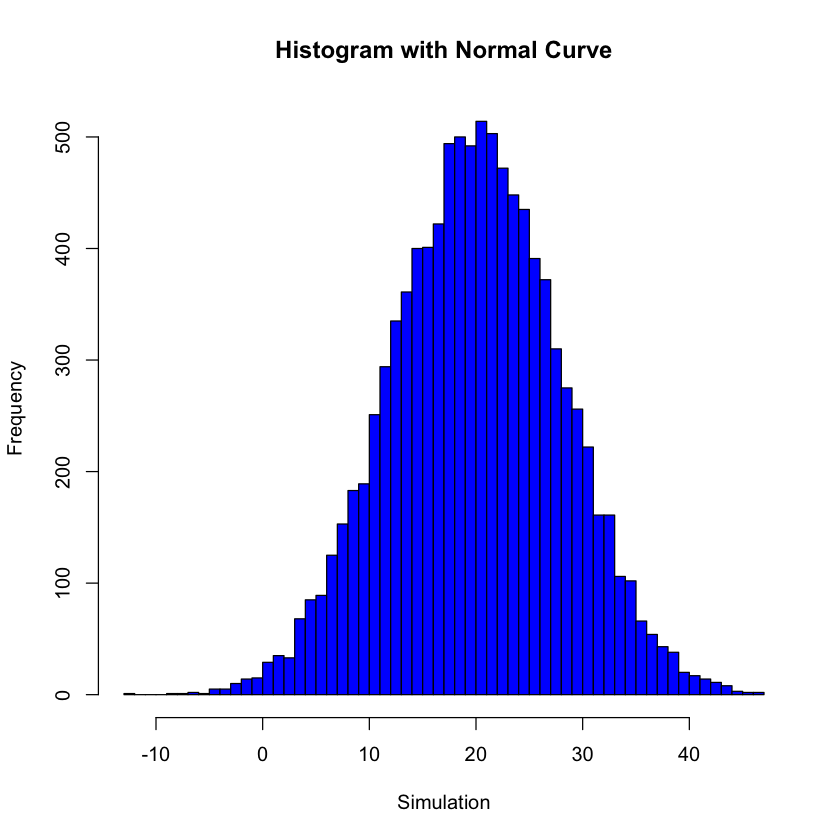

In [26]:
#plot a histogram of the distribution of our sample
h_big<-hist(N_big, breaks=50, col="blue", xlab="Simulation", 
  	main="Histogram with Normal Curve") 
#xfit<-seq(min(N_big),max(N_big),length=10000) 
#yfit<-dnorm(xfit,mean=20,sd=8) 
#yfit <- yfit*diff(h$mids[1:2])*length(N_big) 
#lines(xfit, yfit, col="green", lwd=2) #normal curve

### The Law of Large Numbers
1. The average of many independent samples is (with high probability) close to the mean of the underlying distribution. 
    * We saw this!! The average of the samples was close to E(x)!
2. This density histogram of many independent samples is (with high probability) close to the graph of the density of the underlying distribution.
    * We also saw this!! The histogram and the blue line match up!

## Central Limit Theorem Example (CLT)

### Central Limit Theorem
If the sample size n is "sufficiently large," then:

(1) the sample mean $\bar{X}=\frac{\sum_{i=1}^n}{n} X_i$ follows an approximate normal distribution

(2) with mean $E(\bar{X})=\mu$

(3) and variance $Var(\bar{X})=\frac{\sigma^2}{n}$

We write:

 $$\bar{X}⟶N(\mu,\frac{\sigma^2}{n})\ as \ n\rightarrow\infty$$
 
 ### Example
 
Let X be the random variable associated to drawing a fair dice with outcomes 1,2,3,4,5,6. Suppose $X_1, · · · , X_{30}$ be i.i.d as X.

 
a) X is a discrete random variable

the mean of X: $\mu=\sum_{i=1}^6 (i)(\frac{1}{6})=3.5$

the varaiance of X: $sigma^2=\sum_{i=1}^6 (x_i -\mu)^2 p_i=\frac{1}{6}\sum_{i=1}^6 (x_i -3.5)^2$=3.5

By the central limit theorem, for large n:  $$\bar{X}\sim N(\mu,\frac{\sigma^2}{n})=N(3.5,\frac{3.5}{30}=0.117)$$


a) Find the distribution of the random variable $\bar{X}$ using CLT.
Plot this distribution.

In [30]:
x=seq(2.5,4.5,0.001)

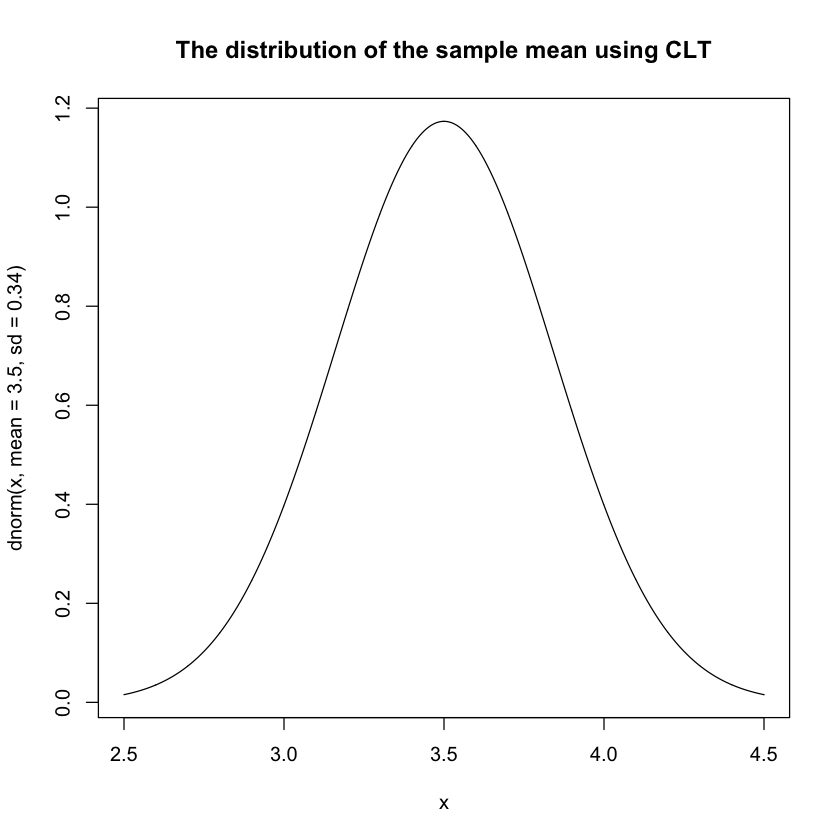

In [31]:
plot(x,dnorm(x,mean=3.5,sd=0.34),type='l',main='The distribution of the sample mean using CLT')

b)This time do not use the CLT, instead by running a simulation in R find the mean and variance 
of $\bar{X}$. You can use the “sample” function in R to roll your dice!

In [32]:
barX=rep(0,1000)
for (i in 1:1000){barX[i]=mean(sample(1:6,30,replace=T))}
mean(barX)
var(barX)

[1] 3.5069

[1] 0.09434562

c) Plot the distribution found in the first and second part in the same graph.

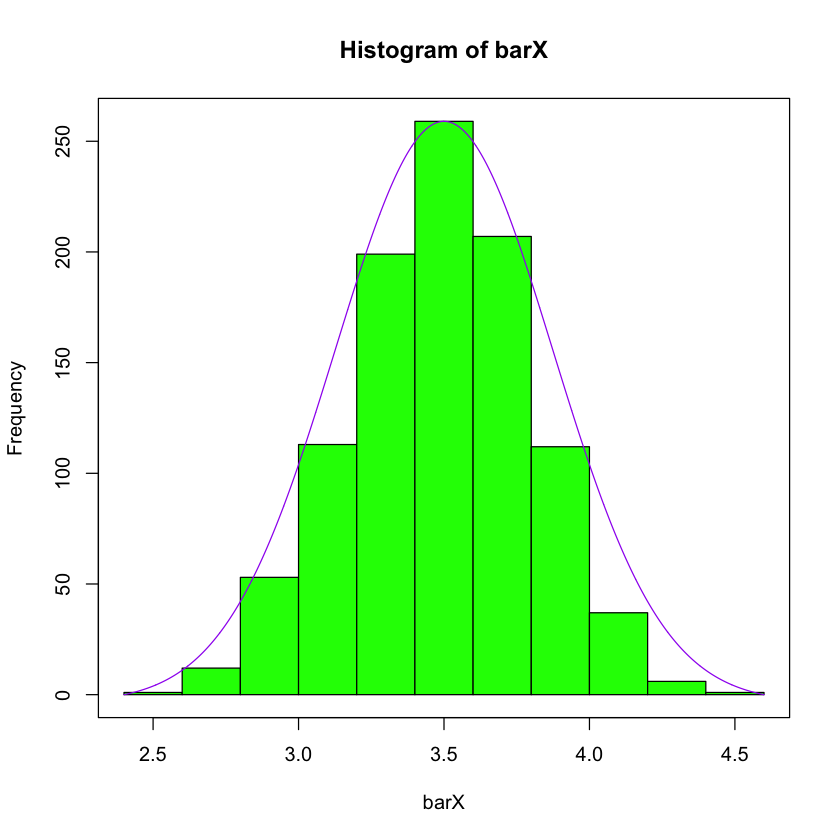

In [33]:
hist(barX,freq=NULL, col="Green")
par(new=TRUE)
plot(x,dnorm(x,mean=3.5,sd=0.34),type='l', xaxt="n", yaxt="n", xlab="", ylab="", col="purple")

In [ ]:
###set your working directory##
#setwd("/Users/sarahmullin/Desktop/BMI 504/")
###make sure datafiles are in the folder that you set your working directory to.
######hospital infection risk data
